<a href="https://colab.research.google.com/github/Pranav2290/Personal-Finance-Analytics-Income-Savings-Credit-Risk-Analysis/blob/main/visualization_and_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### import processed data (cleaned and feature engineered)

In [1]:
from google.colab import files
upload = files.upload()

Saving processed_financial_data.csv to processed_financial_data.csv


In [2]:
import pandas as pd
df = pd.read_csv('processed_financial_data.csv')

In [3]:
df['record_date'] = pd.to_datetime(df['record_date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  32424 non-null  object        
 1   age                      32424 non-null  int64         
 2   gender                   32424 non-null  object        
 3   education_level          32424 non-null  object        
 4   employment_status        32424 non-null  object        
 5   job_title                32424 non-null  object        
 6   monthly_income_usd       32424 non-null  float64       
 7   monthly_expenses_usd     32424 non-null  float64       
 8   savings_usd              32424 non-null  float64       
 9   has_loan                 32424 non-null  object        
 10  loan_type                12995 non-null  object        
 11  loan_amount_usd          32424 non-null  float64       
 12  loan_term_months         32424 n

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

# 1. Univeriate Analysis (one variable)

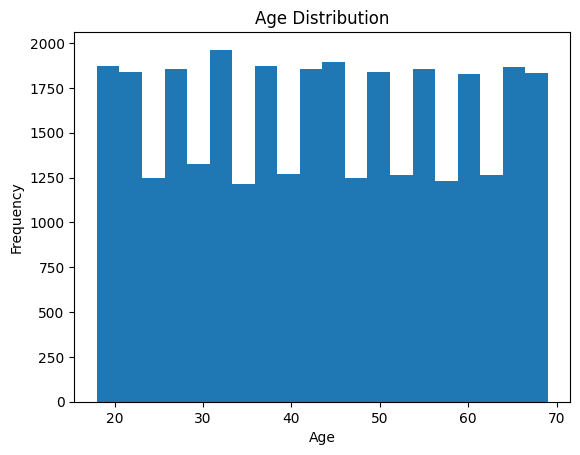

In [6]:
# 1. Age distribution


plt.figure()
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

/tmp/ipython-input-2368044177.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<Axes: xlabel='age', ylabel='Density'>

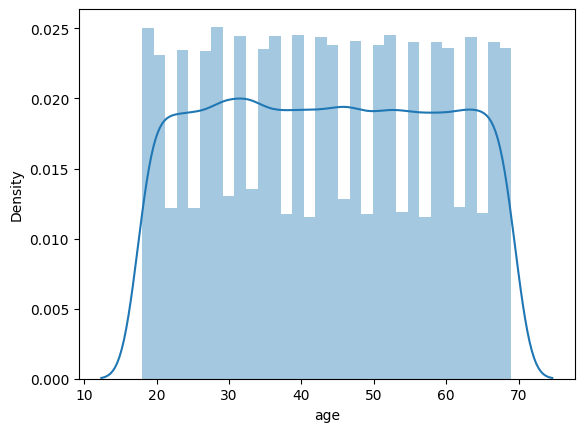

In [7]:

sns.distplot(df['age'])

In [8]:
df['age'].describe()

,age
count,32424.000000
mean,43.415865
std,14.978246
min,18.000000
25%,30.000000
50%,43.000000
75%,56.000000
max,69.000000


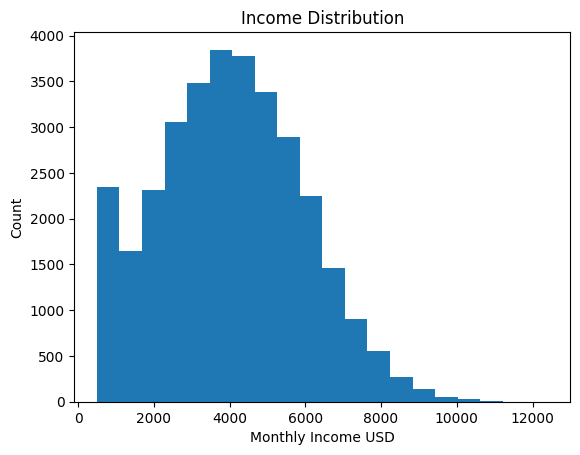

In [9]:
# 2. Income Distribution
plt.figure()
plt.hist( df['monthly_income_usd'], bins=20)
plt.xlabel('Monthly Income USD')
plt.ylabel('Count')
plt.title("Income Distribution")
plt.show()


/tmp/ipython-input-545706291.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['monthly_income_usd'], kde=True)


<Axes: xlabel='monthly_income_usd', ylabel='Density'>

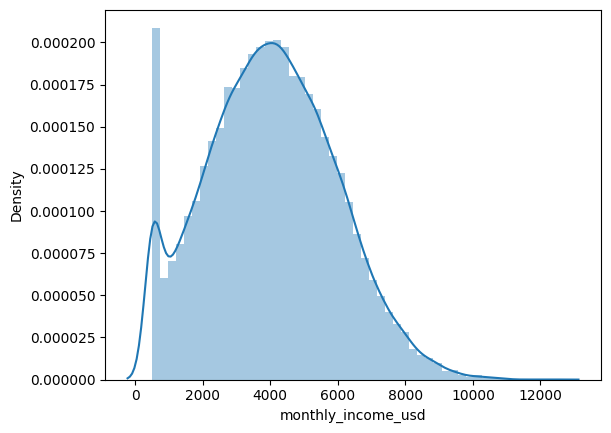

In [10]:
sns.distplot(df['monthly_income_usd'], kde=True)

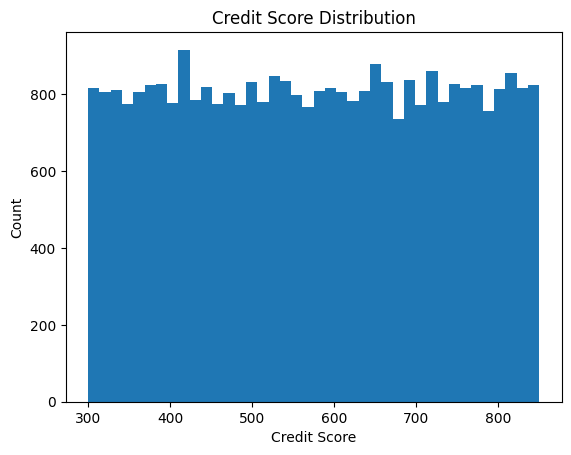

In [11]:
# 3. Credit score distribution
plt.figure()
plt.hist(df['credit_score'], bins=40)
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Credit Score Distribution')
plt.show()

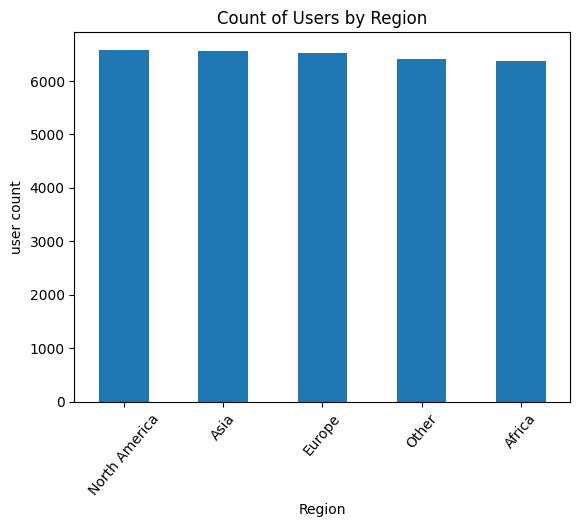

In [12]:
# 4. count of users by region
region_counts = df['region'].value_counts()

plt.figure()
region_counts.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('user count')
plt.title('Count of Users by Region')
plt.xticks(rotation=50)
plt.show()

# 2. Bivariet Analysis

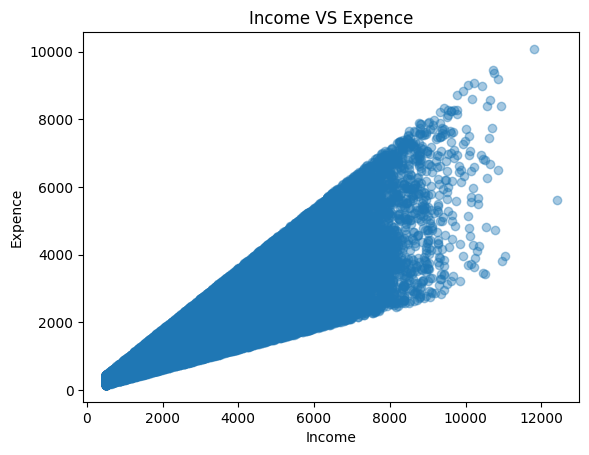

In [13]:
# 5. Income vs Expenses

plt.scatter( df['monthly_income_usd'], df['monthly_expenses_usd'], alpha= 0.4)
plt.xlabel('Income')
plt.ylabel('Expence')
plt.title('Income VS Expence')
plt.show()

In [14]:
df[['monthly_income_usd', 'monthly_expenses_usd']].corr()

,monthly_income_usd,monthly_expenses_usd
monthly_income_usd,1.000000,0.829171
monthly_expenses_usd,0.829171,1.000000


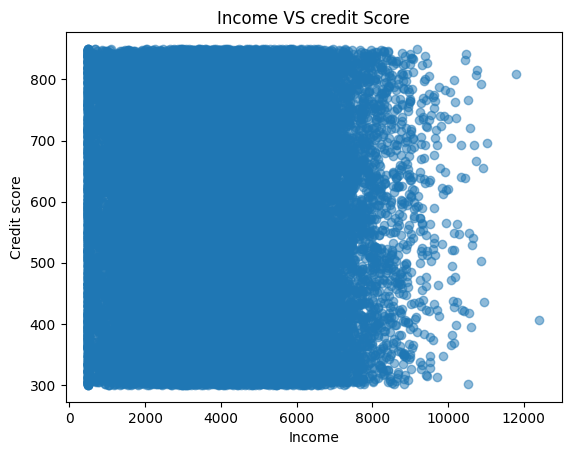

In [15]:
# 6. Income vs Credit Score
plt.figure()
plt.scatter( df['monthly_income_usd'], df['credit_score'], alpha=0.5)
plt.xlabel('Income')
plt.ylabel('Credit score')
plt.title('Income VS credit Score')
plt.show()

In [16]:
df[['monthly_income_usd', 'credit_score']].corr()

,monthly_income_usd,credit_score
monthly_income_usd,1.000000,-0.004001
credit_score,-0.004001,1.000000


<Axes: xlabel='monthly_income_usd', ylabel='credit_score'>

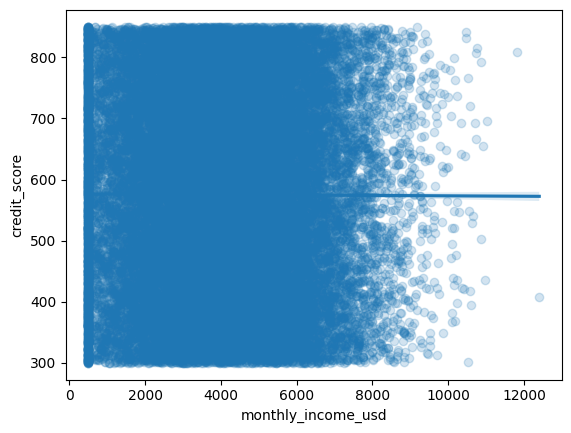

In [17]:
sns.regplot(x='monthly_income_usd', y='credit_score', data=df, scatter_kws={'alpha':0.2})

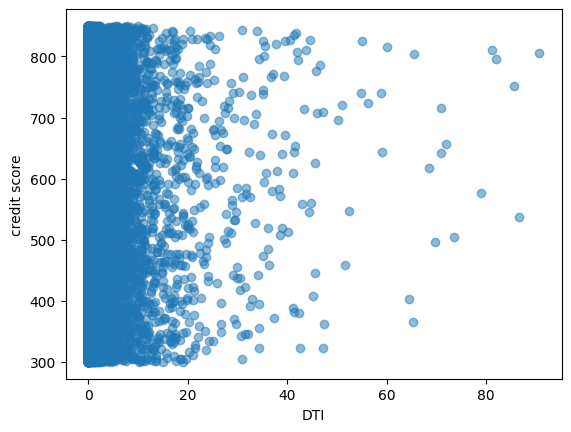

In [18]:
# 7. Debt-to-Income vs Credit Score
plt.figure()
plt.scatter( df['debt_to_income_ratio'], df['credit_score'] , alpha=0.5 )
plt.xlabel('DTI')
plt.ylabel('credit score')
plt.show()


In [19]:
df[['debt_to_income_ratio', 'credit_score']].corr()

,debt_to_income_ratio,credit_score
debt_to_income_ratio,1.000000,0.012049
credit_score,0.012049,1.000000


Text(0.5, 0, 'Savings')

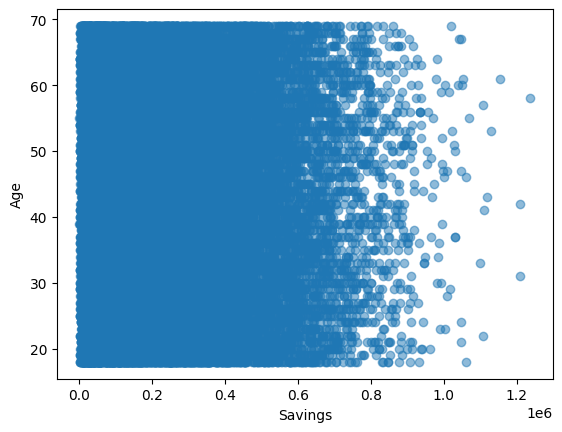

In [20]:
# age vs savings
plt.figure()
plt.scatter(df['savings_usd'], df['age'] , alpha=0.5)
plt.ylabel('Age')
plt.xlabel('Savings')


# 3. Categorical vs Numerical

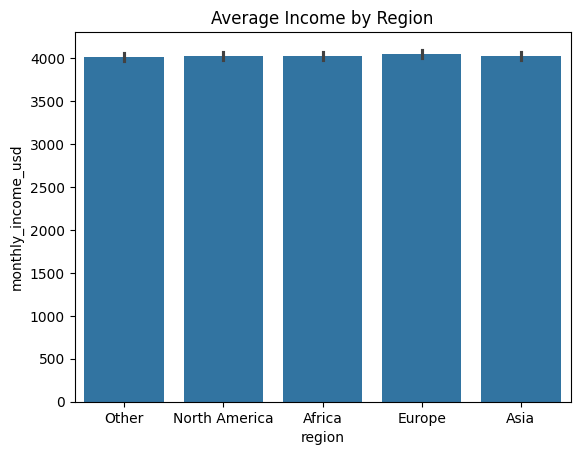

In [21]:
# 8. Average Income by Region
plt.figure()
sns.barplot(
    x='region',
    y='monthly_income_usd',
    data=df,
    estimator=np.mean
)
plt.title('Average Income by Region')
plt.show()

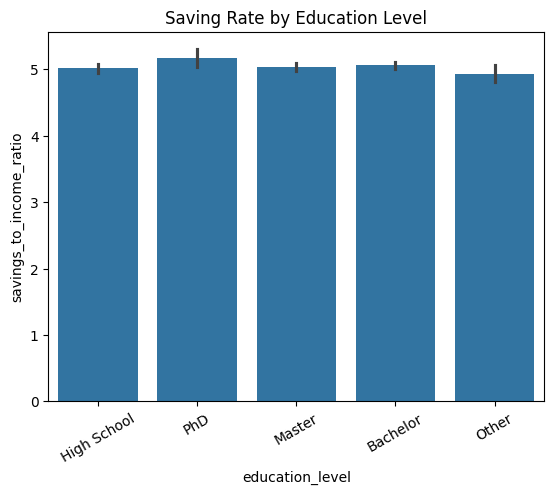

In [22]:
# 9. Savings Rate by Education Level
plt.figure()
sns.barplot(
    x='education_level',
    y='savings_to_income_ratio',
    data=df,
    estimator=np.mean
)
plt.title('Saving Rate by Education Level')
plt.xticks(rotation=30)
plt.show()

<Axes: xlabel='has_loan', ylabel='credit_score'>

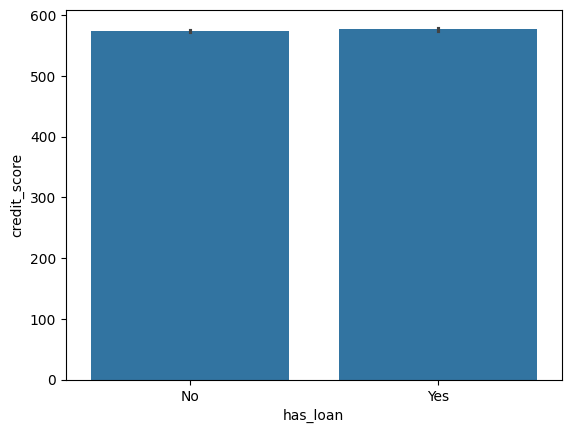

In [23]:
# 10.Credit Score by Loan Status
sns.barplot(
    x='has_loan',
    y='credit_score',
    data=df
)

In [24]:
df.groupby('has_loan')['credit_score'].mean()

,credit_score
has_loan,
No,574.125019
Yes,576.957984


# 4. Distribution and Risk Analysis

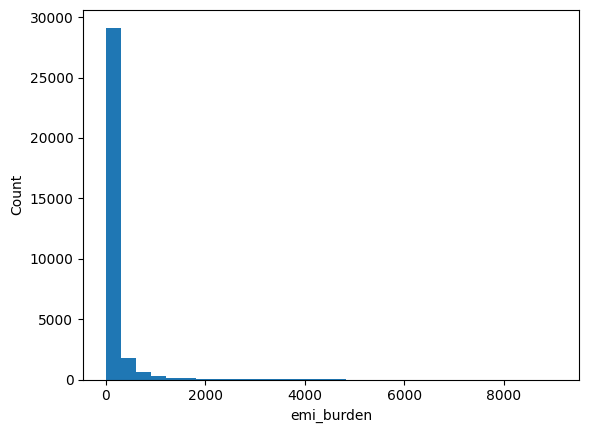

In [25]:
# 11. EMI durden distribution
plt.figure()
plt.hist( df['emi_burden'], bins=30)
plt.xlabel('emi_burden')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='income_bracket', ylabel='credit_score'>

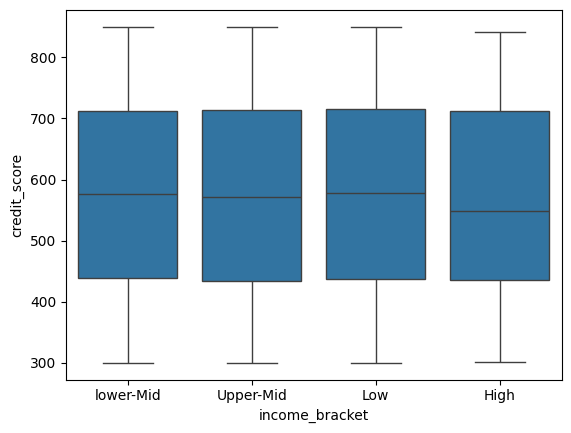

In [26]:
# 12. Credit score by Income bracket
plt.figure()
sns.boxplot(
    x='income_bracket',
    y='credit_score',
    data=df
)

In [27]:
df['debt_to_income_ratio'].describe()
# the values are misleading because they count the user wich has no debt

,debt_to_income_ratio
count,32424.000000
mean,1.194881
std,3.761964
min,0.000000
25%,0.000000
50%,0.000000
75%,0.920000
max,90.670000


In [28]:
# he have to change Dtype of has_loan to bool from Yes No
df['has_loan'] = (
    df['has_loan']
    .str.strip()
    .str.lower()
    .map({ 'yes':True, 'no':False})
)

# other way to change
#df['has_loan'] = df['has_loan'].replace({ 'yes':True, 'no':False})

In [29]:
# chech distribution of debt_to_income_ratio_now
df[ df['has_loan'] == True]['debt_to_income_ratio'].describe()

,debt_to_income_ratio
count,12995.000000
mean,2.981364
std,5.476025
min,0.000000
25%,0.580000
50%,1.350000
75%,3.070000
max,90.670000


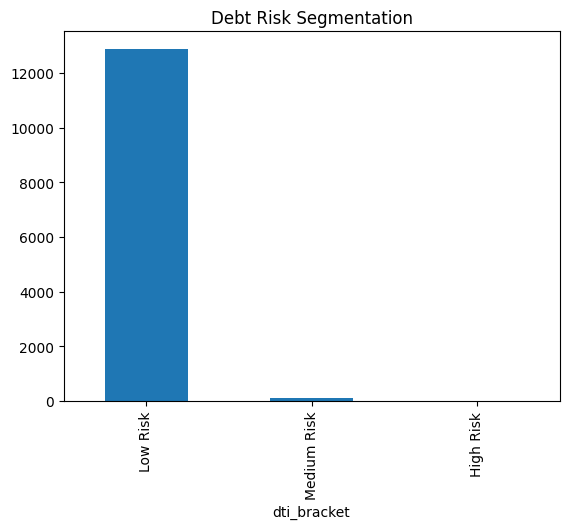

In [30]:
# 13. Debt Risk Segmentation (DTI Buckets)
df['dti_bracket'] = pd.cut(
    df['debt_to_income_ratio'],
    bins=[0, 30.00, 60.00, 100.00],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

plt.figure
df['dti_bracket'].value_counts().plot(kind='bar')
plt.title('Debt Risk Segmentation')
plt.show()


In [31]:
df['dti_bracket'].value_counts()

,count
dti_bracket,
Low Risk,12876
Medium Risk,94
High Risk,15


# 5. Time Series Visualization

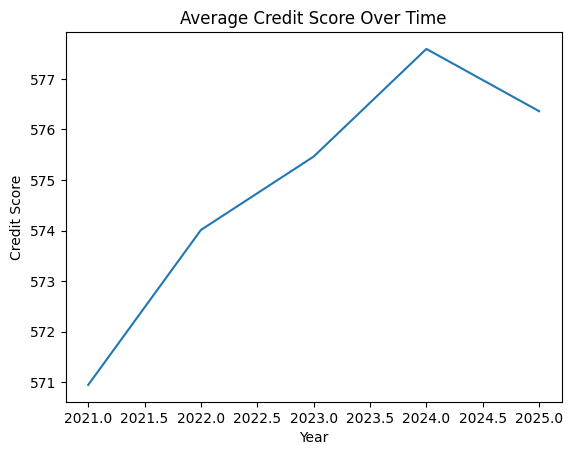

In [32]:
# 14 Average Credit Score Over Time
crdit_trend = df.groupby( df['record_date'].dt.year)['credit_score'].mean()

plt.figure()
crdit_trend.plot()
plt.xlabel('Year')
plt.ylabel('Credit Score')
plt.title('Average Credit Score Over Time')
plt.show()

Text(0.5, 1.0, 'Expenses Trend Over Time')

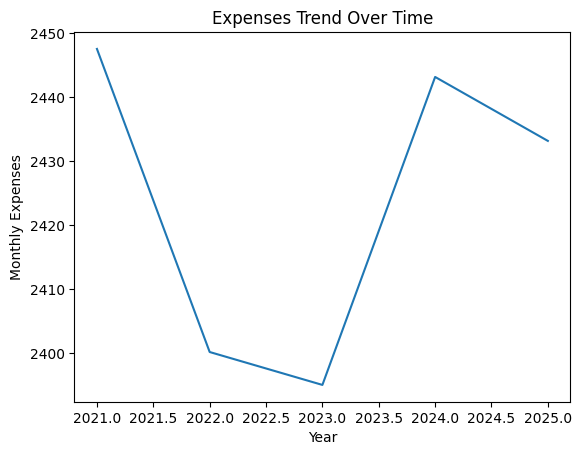

In [33]:
# 15 Expenses Trend Over Time
expense_trend = df.groupby( df['record_date'].dt.year)['monthly_expenses_usd'].mean()

expense_trend.plot()
plt.xlabel('Year')
plt.ylabel('Monthly Expenses')
plt.title('Expenses Trend Over Time')

# 6. Multivariate Analysis

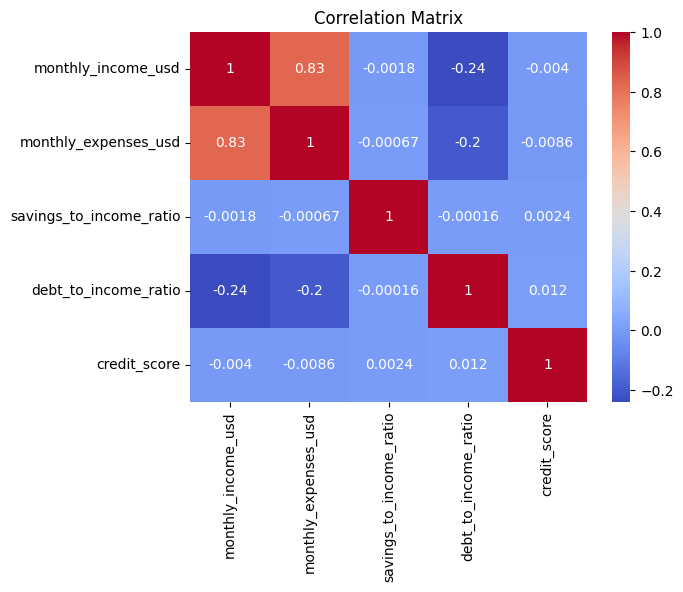

In [34]:
# 16 Correlation Heatmap
plt.figure()
sns.heatmap(
   df [['monthly_income_usd', 'monthly_expenses_usd',
      'savings_to_income_ratio', 'debt_to_income_ratio',
      'credit_score']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Matrix')
plt.show()

Text(0.5, 1.0, ' Financial Score by Region')

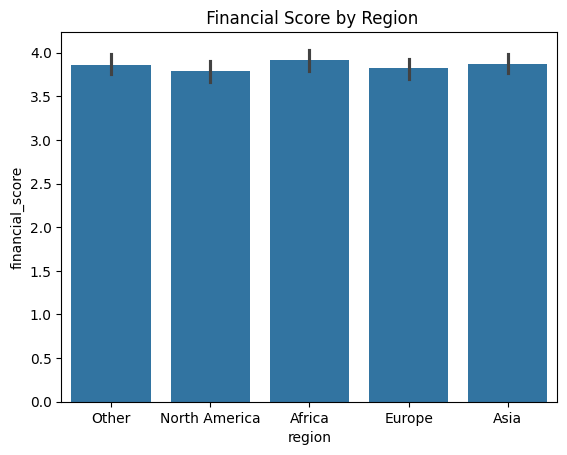

In [35]:
# 17. Financial Score by Region
df['financial_score'] = df['savings_to_income_ratio'] - df['debt_to_income_ratio']

plt.figure()
sns.barplot(
    x='region',
    y='financial_score',
    data=df,
    estimator=np.mean
)
plt.title(' Financial Score by Region')


# 7. Executive Dashbord Thinking

Text(0.5, 1.0, 'Customer Segmentation')

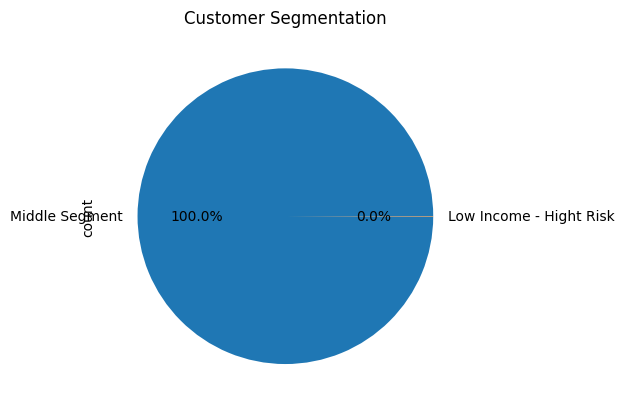

In [36]:
from enum import auto
# 18. Customer Segmentation Distribution
plt.figure()
df['customer_segment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Segmentation')

In [37]:
df['customer_segment'].value_counts()

,count
customer_segment,
Middle Segment,32409
Low Income - Hight Risk,15


<Axes: xlabel='monthly_income_usd', ylabel='debt_to_income_ratio'>

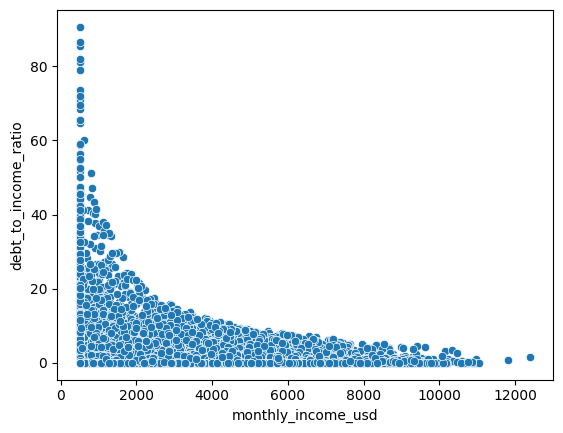

In [38]:
# 19. High-Risk Customers Profile
hight_risk = df[ df['customer_segment'] == 'Low Income - High Risk']

sns.scatterplot(
    x='monthly_income_usd',
    y='debt_to_income_ratio',
    data= df
)

In [39]:
df

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,...,record_date,income_bracket,spending_ratio,net_savings,emi_burden,credit_bracket,year,customer_segment,dti_bracket,financial_score
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,False,...,2024-01-09,lower-Mid,33.49,2349.10,0.00,Poor,2024,Middle Segment,NaN,8.68
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,True,...,2022-02-13,lower-Mid,67.05,1163.74,140.26,Poor,2022,Middle Segment,Low Risk,4.76
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,False,...,2022-05-12,lower-Mid,35.86,1795.58,0.00,Excellent,2022,Middle Segment,NaN,6.87
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,True,...,2023-10-02,Upper-Mid,75.32,1454.76,83.57,Poor,2023,Middle Segment,Low Risk,3.47
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,False,...,2021-08-07,Upper-Mid,80.67,991.32,0.00,Poor,2021,Middle Segment,NaN,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32419,U32420,30,Female,High School,Employed,Salesperson,4266.87,1510.82,273669.70,True,...,2024-02-25,lower-Mid,35.41,2756.05,145.95,Poor,2024,Middle Segment,Low Risk,3.88
32420,U32421,51,Female,Master,Employed,Student,5725.78,4965.02,17247.57,True,...,2025-06-06,Upper-Mid,86.71,760.76,132.82,Poor,2025,Middle Segment,Low Risk,-1.08
32421,U32422,18,Female,Bachelor,Self-employed,Doctor,3282.38,2243.77,22081.21,False,...,2025-07-20,lower-Mid,68.36,1038.61,0.00,Poor,2025,Middle Segment,NaN,0.56
32422,U32423,36,Other,High School,Self-employed,Accountant,5035.99,4054.32,524039.88,False,...,2022-06-07,Upper-Mid,80.51,981.67,0.00,Poor,2022,Middle Segment,NaN,8.67


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  32424 non-null  object        
 1   age                      32424 non-null  int64         
 2   gender                   32424 non-null  object        
 3   education_level          32424 non-null  object        
 4   employment_status        32424 non-null  object        
 5   job_title                32424 non-null  object        
 6   monthly_income_usd       32424 non-null  float64       
 7   monthly_expenses_usd     32424 non-null  float64       
 8   savings_usd              32424 non-null  float64       
 9   has_loan                 32424 non-null  bool          
 10  loan_type                12995 non-null  object        
 11  loan_amount_usd          32424 non-null  float64       
 12  loan_term_months         32424 n